#### Q. Local Rank 의미?
A. 각 노드별 GPU 프로세스 ID
<사전 지식>
- GPU가 달려있는 컴퓨터를 노드라고 한다.
- World Size: 분산 처리에 사용할 총 GPU 갯수
- Rank: Data Distributed Parallel에서 가동되는 process ID
- Global Rank: 전체 node에 가동되는 process id
- Local Rank: 각 node별 process id
- torch.distributed.launch를 통해 multi-node 학습을 진행할 경우, 자동으로 os.environ['RANK'], os.environ['LOCAL_RANK'], os.environ['WORLD_SIZE'] 등이 생성 된다.


```
args.world_size = int(os.getenv('WORLD_SIZE', 1))
args.distributed = int(os.getenv('WORLD_SIZE', 1)) > 1
```

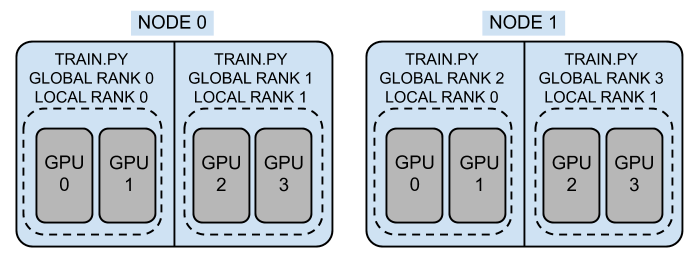

참고
- https://pytorch.org/docs/stable/elastic/run.html
- 

#### Q. torch.cuda.synchronize() 의미??
A. CUDA 장치의 모든 스트림에 있는 모든 커널이 완료될 때까지 기다린다.
- https://pytorch.org/docs/stable/generated/torch.cuda.synchronize.html
- https://discuss.pytorch.org/t/how-does-torch-cuda-synchronize-behave/147049

DISTRIBUTED DATA PARALLEL
##### `torch.nn.parallel.DistributedDataParallel`
- 인자: (module, device_ids=None, output_device=None, dim=0, broadcast_buffers=True, process_group=None, bucket_cap_mb=25, find_unused_parameters=False, check_reduction=False, gradient_as_bucket_view=False, static_graph=False, delay_all_reduce_named_params=None, param_to_hook_all_reduce=None, mixed_precision=None)
- https://pytorch.org/docs/stable/generated/torch.nn.parallel.DistributedDataParallel.html#torch.nn.parallel.DistributedDataParallel

##### `CLASS torch.utils.data.distributed.DistributedSampler(dataset, num_replicas=None, rank=None, shuffle=True, seed=0, drop_last=False)`
- https://pytorch.org/docs/stable/data.html
- 데이터 로드를 데이터 세트의 하위 집합으로 제한하는 샘플러
- torch.nn.parallel.DistributedDataParallel 과 사용하면 특히 유용한데, 이런 경우 각 프로세스는 DistributedSampler 객체를 DataLoader 샘플러로 전달하고, 해당 프로세스에 배타적인 원본 데이터셋의 하위 집합을 로드할 수 있다(??)
  - 여기서 데이터 셋 크기는 일정하고, 모든 객체가 동일한 요소를 동일한 순서로 반환한다고 가정한다.

- 분산 모드에서는 .set_epoch() 메소드를 각 애폭 시작전에 호출해야 한다.
- DataLoader 이터레이터를 생성하기 전에(?)
- 그래야 Shuffling이 여러 애폭에 걸쳐 잘 동작한다. 

In [ ]:
sampler = DistributedSampler(dataset) if is_distributed else None
loader = DataLoader(dataset, shuffle=(sampler is None), sampler=sampler)
for epoch in range(start_epoch, n_epochs):
    if is_distributed:
        sampler.set_epoch(epoch)
    train(loader)